In [1]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.8.2'

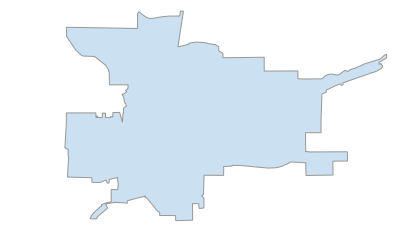

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e5dcf5e128>)

In [22]:
city= ox.gdf_from_place('Pullman, Washington')
ox.plot_shape(ox.project_gdf(city))

### Walk map of Pullman

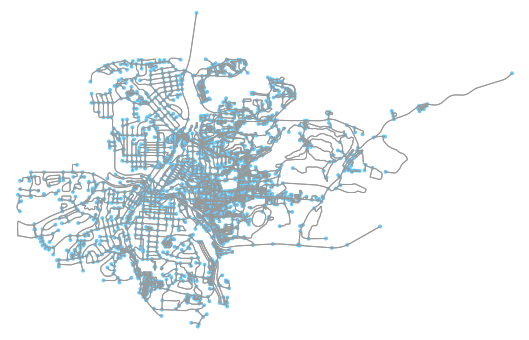

Pullman, Washington, USA


In [7]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='walk')
fig, ax = ox.plot_graph(G)
print(G)

### Drive Map of Pullman

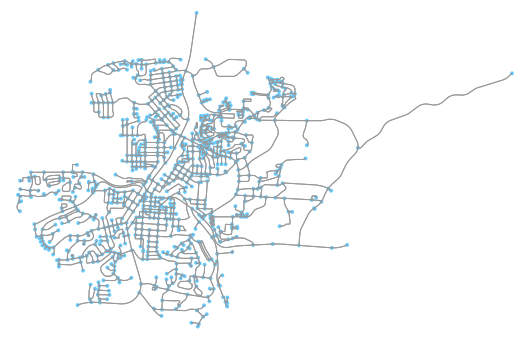

In [9]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

### Bike map of Pullman 

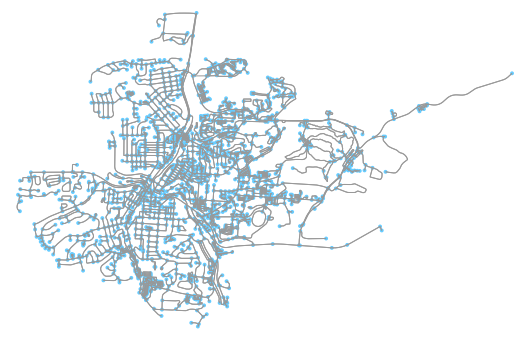

In [10]:
G = ox.graph_from_place('Pullman, Washington, USA', network_type='bike')
fig, ax = ox.plot_graph(G)

### Size of area in square meter

In [26]:
G_proj = ox.project_graph(G)
#nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
#graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

31710800.3787863

### Network Circuity 

In [14]:
basic_stats = ox.basic_stats(G)
print(basic_stats['circuity_avg'])

1.102445616196516


### Number of edges in the graph

In [22]:
edges = ox.basic_stats(G)
print(edges['m'])

{'n': 991, 'm': 2561, 'k_avg': 5.1685166498486375, 'intersection_count': 742, 'streets_per_node_avg': 2.6337033299697277, 'streets_per_node_counts': {0: 0, 1: 249, 2: 0, 3: 607, 4: 135}, 'streets_per_node_proportion': {0: 0.0, 1: 0.2512613521695257, 2: 0.0, 3: 0.6125126135216953, 4: 0.136226034308779}, 'edge_length_total': 354032.5429999999, 'edge_length_avg': 138.2399621241702, 'street_length_total': 182941.95, 'street_length_avg': 138.90808656036447, 'street_segments_count': 1317, 'node_density_km': None, 'intersection_density_km': None, 'edge_density_km': None, 'street_density_km': None, 'circuity_avg': 1.102445616196516, 'self_loop_proportion': 0.017180788754392814, 'clean_intersection_count': None, 'clean_intersection_density_km': None}


### Number of Nodes in the graph 

In [23]:
node = ox.basic_stats(G)
print(node['n'])

991


### Number of Intersection

In [25]:
inter = ox.basic_stats(G)
print(inter['intersection_count'])

742


### Average Street Length

In [28]:
st_avg = ox.basic_stats(G)
print(inter['street_length_avg'])

138.90808656036447


### Edge Length Total

In [29]:
edge_total= ox.basic_stats(G)
print(inter['edge_length_total'])

354032.5429999999


### Average Degree of Centrality

In [32]:
dc = ox.extended_stats(G)
print(dc['degree_centrality_avg'])

0.0052207238887359364


### Maximum Page Rank

In [41]:
pg = ox.extended_stats(G)
print(pg['pagerank_max'])

0.0029703753233060164


### Shortesth Path 

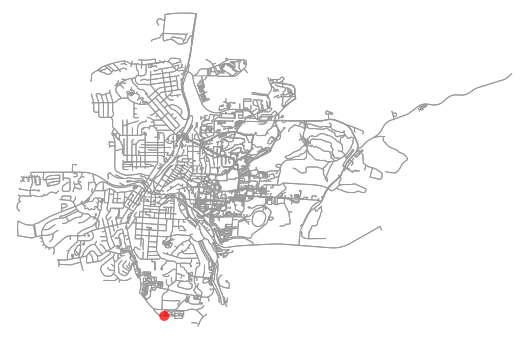

In [70]:
orig_node = ox.get_nearest_node(G, (37.828903, -122.245846))
dest_node = ox.get_nearest_node(G, (37.812303, -122.215006))
route = nx.shortest_path(G,orig_node,dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [3]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

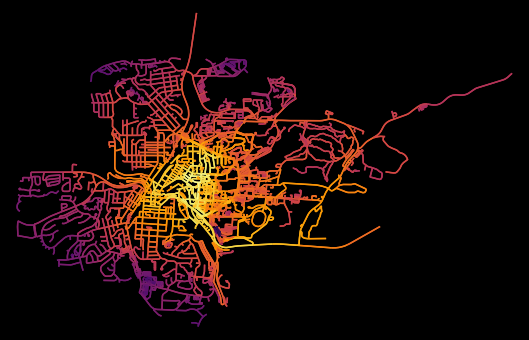

In [4]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

In [39]:
build = ox.buildings_from_place('Pullman')
print(type(build))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [40]:
restaurants = ox.pois_from_place('Pullman', amenities=['restaurant'])

In [41]:
len(restaurants)

33

In [28]:
restaurants.columns

Index(['addr:city', 'addr:housenumber', 'addr:postcode', 'addr:state',
       'addr:street', 'amenity', 'cuisine', 'delivery', 'element_type',
       'email', 'geometry', 'name', 'opening_hours', 'osmid', 'phone',
       'smoking', 'takeaway', 'toilets:wheelchair', 'wheelchair', 'building',
       'nodes', 'website'],
      dtype='object')

In [30]:
restaurants.head()

,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,cuisine,delivery,element_type,email,...,opening_hours,osmid,phone,smoking,takeaway,toilets:wheelchair,wheelchair,building,nodes,website
580151963,NaN,NaN,NaN,NaN,NaN,restaurant,pizza,NaN,node,NaN,...,NaN,580151963,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN
687172530,NaN,NaN,NaN,NaN,NaN,restaurant,steak_house,NaN,node,NaN,...,NaN,687172530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1707897405,NaN,NaN,NaN,NaN,NaN,restaurant,chinese,NaN,node,NaN,...,NaN,1707897405,NaN,NaN,NaN,no,yes,NaN,NaN,NaN
2390203350,NaN,NaN,NaN,NaN,NaN,restaurant,chinese,NaN,node,NaN,...,NaN,2390203350,509-332-1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2501960477,NaN,NaN,NaN,NaN,NaN,restaurant,asian,NaN,node,NaN,...,NaN,2501960477,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN
2611745614,NaN,NaN,NaN,NaN,NaN,restaurant,mexican,NaN,node,NaN,...,NaN,2611745614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2673340519,NaN,NaN,NaN,NaN,NaN,restaurant,mexican,NaN,node,NaN,...,NaN,2673340519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2673340566,NaN,NaN,NaN,NaN,NaN,restaurant,pizza,NaN,node,NaN,...,NaN,2673340566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2673989163,NaN,NaN,NaN,NaN,NaN,restaurant,pizza,NaN,node,NaN,...,NaN,2673989163,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
2675657249,NaN,NaN,NaN,NaN,NaN,restaurant,NaN,NaN,node,NaN,...,NaN,2675657249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Plot the footprint
ax = city.plot(facecolor='black')

# Plot street edges
#edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
build.plot(ax=ax, facecolor='plum', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='red', alpha=0.7, markersize=10)
cm.tight_layout()